In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
df = pd.read_csv('Dataset/training/fsi-2006-to-2013.csv')

In [ ]:
dft = pd.read

In [72]:
df.shape


(1387, 16)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1387 non-null   object 
 1   Year                              1387 non-null   int64  
 2   Rank                              1387 non-null   object 
 3   Total                             1387 non-null   float64
 4   C1: Security Apparatus            1387 non-null   float64
 5   C2: Factionalized Elites          1387 non-null   float64
 6   C3: Group Grievance               1387 non-null   float64
 7   E1: Economy                       1387 non-null   float64
 8   E2: Economic Inequality           1387 non-null   float64
 9   E3: Human Flight and Brain Drain  1387 non-null   float64
 10  P1: State Legitimacy              1387 non-null   float64
 11  P2: Public Services               1387 non-null   float64
 12  P3: Hu

In [74]:
filtw =(df['Total'] >=60.0) & (df['Total'] <= 89.9) 
filts =(df['Total'] >=0.0) & (df['Total'] <= 29.9) 
filtst =(df['Total'] >=30) & (df['Total'] <= 59.9)
filta =(df['Total'] >=90)
filtn =(df['Total'] < 0)

In [75]:
df['cluster']= df['Total']

In [76]:
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,cluster
0,Somalia,2013,1st,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4,113.9
1,Congo Democratic Republic,2013,2nd,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7,111.9
2,Sudan,2013,3rd,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0,111.0
3,South Sudan,2013,4th,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0,110.6
4,Chad,2013,5th,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Switzerland,2006,142nd,18.7,1.0,1.0,2.0,1.2,2.5,2.0,1.0,1.0,1.5,3.0,1.5,1.0,18.7
1383,Ireland,2006,143rd,18.6,1.0,1.0,1.0,1.9,3.0,2.0,1.5,1.3,1.5,2.0,1.4,1.0,18.6
1384,Finland,2006,144th,18.2,1.0,1.0,1.0,2.2,2.0,2.0,1.0,1.0,1.5,3.0,1.5,1.0,18.2
1385,Sweden,2006,144th,18.2,1.0,1.0,1.0,1.2,2.0,2.0,1.0,1.0,1.5,3.0,2.5,1.0,18.2


In [77]:
df.loc[filta,'cluster']='alert'
df.loc[filtw,'cluster']='warning'
df.loc[filts,'cluster']='sustainable'
df.loc[filtst,'cluster']='stable'
df.loc[filtn,'cluster']='na'
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,cluster
0,Somalia,2013,1st,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4,alert
1,Congo Democratic Republic,2013,2nd,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7,alert
2,Sudan,2013,3rd,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0,alert
3,South Sudan,2013,4th,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0,alert
4,Chad,2013,5th,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9,alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Switzerland,2006,142nd,18.7,1.0,1.0,2.0,1.2,2.5,2.0,1.0,1.0,1.5,3.0,1.5,1.0,sustainable
1383,Ireland,2006,143rd,18.6,1.0,1.0,1.0,1.9,3.0,2.0,1.5,1.3,1.5,2.0,1.4,1.0,sustainable
1384,Finland,2006,144th,18.2,1.0,1.0,1.0,2.2,2.0,2.0,1.0,1.0,1.5,3.0,1.5,1.0,sustainable
1385,Sweden,2006,144th,18.2,1.0,1.0,1.0,1.2,2.0,2.0,1.0,1.0,1.5,3.0,2.5,1.0,sustainable


In [86]:
X=df.loc[:, ['Year','Total']].values
X

array([[2013. ,  113.9],
       [2013. ,  111.9],
       [2013. ,  111. ],
       ...,
       [2006. ,   18.2],
       [2006. ,   18.2],
       [2006. ,   16.8]])

In [87]:
Y=df.loc[:, 'cluster'].values
Y

array(['alert', 'alert', 'alert', ..., 'sustainable', 'sustainable',
       'sustainable'], dtype=object)

In [101]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [102]:
X_Train

array([[2011. ,   57.8],
       [2011. ,   35.1],
       [2010. ,   84.4],
       ...,
       [2007. ,   39.2],
       [2010. ,   95.4],
       [2010. ,   41.5]])

In [103]:
X_Test

array([[2010. ,   38. ],
       [2013. ,   69.8],
       [2012. ,   56.1],
       [2011. ,   46.8],
       [2013. ,   44.4],
       [2012. ,   96.5],
       [2006. ,   18.6],
       [2009. ,  105.4],
       [2009. ,   73. ],
       [2006. ,   56.2],
       [2008. ,   79.7],
       [2007. ,   71.6],
       [2011. ,   88.5],
       [2012. ,   64.1],
       [2011. ,   85. ],
       [2009. ,   46.1],
       [2011. ,   49.5],
       [2008. ,   51. ],
       [2008. ,   59.9],
       [2012. ,   66.5],
       [2007. ,   65.7],
       [2011. ,   52.8],
       [2007. ,   96.4],
       [2013. ,   75.9],
       [2009. ,   80.6],
       [2009. ,   84.1],
       [2013. ,   33.2],
       [2013. ,   32.6],
       [2013. ,   47.3],
       [2011. ,   76.1],
       [2009. ,   37.5],
       [2013. ,   84.2],
       [2011. ,   90.2],
       [2007. ,   97.7],
       [2011. ,   74.5],
       [2012. ,   47.4],
       [2013. ,   91.5],
       [2012. ,   85.7],
       [2006. ,   74.8],
       [2007. ,   89.7],


In [89]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [90]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [93]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array(['stable', 'warning', 'stable', 'stable', 'stable', 'alert',
       'sustainable', 'alert', 'warning', 'stable', 'warning', 'warning',
       'warning', 'warning', 'warning', 'stable', 'stable', 'stable',
       'stable', 'warning', 'warning', 'stable', 'alert', 'warning',
       'warning', 'warning', 'stable', 'stable', 'stable', 'warning',
       'stable', 'warning', 'warning', 'alert', 'warning', 'stable',
       'alert', 'warning', 'warning', 'warning', 'warning', 'sustainable',
       'warning', 'alert', 'warning', 'alert', 'warning', 'warning',
       'stable', 'stable', 'warning', 'alert', 'stable', 'stable',
       'alert', 'warning', 'warning', 'alert', 'warning', 'alert',
       'warning', 'warning', 'warning', 'warning', 'warning', 'warning',
       'stable', 'warning', 'sustainable', 'warning', 'warning', 'alert',
       'stable', 'warning', 'stable', 'stable', 'alert', 'warning',
       'warning', 'warning', 'warning', 'stable', 'warning', 'warning',
       'sustaina

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[ 66,   0,   0,   3],
       [  0,  68,   1,   0],
       [  0,   0,  25,   0],
       [  0,   3,   0, 181]])

In [97]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X_Set


array([[ 0.63278445, -0.56666879],
       [ 0.63278445, -1.54581777],
       [ 0.19170146,  0.58070403],
       ...,
       [-1.13154753, -1.36896707],
       [ 0.19170146,  1.05518151],
       [ 0.19170146, -1.26975814]])

In [98]:
Y_Set

array(['stable', 'stable', 'warning', ..., 'stable', 'alert', 'stable'],
      dtype=object)

In [99]:
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

ValueError: could not convert string to float: 'sustainable'

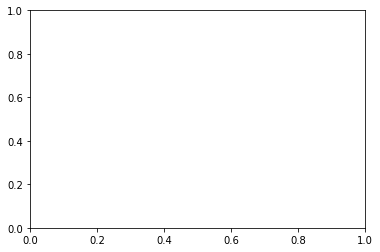

In [100]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))